### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
tf.__version__

'1.13.1'

### Collect Data

In [0]:
import keras

In [0]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [50]:
print(y_test[0:5])

[9 2 1 1 6]


In [51]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

('x_train shape:', (60000, 28, 28), 'y_train shape:', (60000,))


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

Label Description 
0 T-shirt/top 
1 Trouser 
2 Pullover 
3 Dress 
4 Coat 
5 Sandal 
6 Shirt 
7 Sneaker 
8 Bag 
9 Ankle boot

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [54]:
print(y_train.shape)
print('First 5 examples now are: ', y_train[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

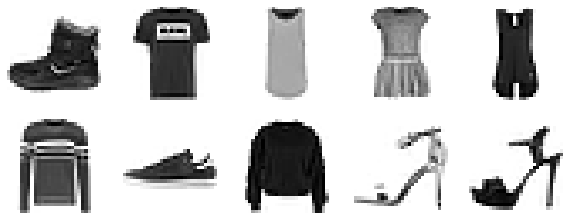

In [55]:
# Show one of the images from the training dataset
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [60]:
model = tf.keras.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))


#Add 1st hidden layer
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))


#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [62]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 63us/sample - loss: 1.5653 - acc: 0.5990 - val_loss: 1.1442 - val_acc: 0.7073
Epoch 2/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.9795 - acc: 0.7290 - val_loss: 0.8791 - val_acc: 0.7277
Epoch 3/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.8069 - acc: 0.7494 - val_loss: 0.7696 - val_acc: 0.7479
Epoch 4/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.7235 - acc: 0.7629 - val_loss: 0.7082 - val_acc: 0.7603
Epoch 5/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.6722 - acc: 0.7742 - val_loss: 0.6676 - val_acc: 0.7693
Epoch 6/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.6363 - acc: 0.7839 - val_loss: 0.6370 - val_acc: 0.7784
Epoch 7/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.6088 - acc: 0.7920 - val_loss: 0.

In [63]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.8001)


In [64]:
model.predict(x_test)

array([[1.8577202e-04, 9.6131887e-05, 8.3348725e-04, ..., 2.5909156e-01,
        1.6395278e-02, 5.0458288e-01],
       [2.7087408e-03, 2.0451970e-04, 8.4194881e-01, ..., 2.0902669e-05,
        1.1857708e-03, 9.4576208e-05],
       [3.6122973e-04, 9.9678552e-01, 2.0684050e-04, ..., 1.6797927e-05,
        2.8276463e-06, 8.6486745e-07],
       ...,
       [1.0773549e-01, 1.7934300e-04, 2.8107462e-03, ..., 7.2256208e-04,
        6.6424036e-01, 1.2382671e-03],
       [2.2293462e-03, 9.2459863e-01, 1.8726925e-03, ..., 4.5108394e-04,
        2.5328514e-05, 6.7363486e-05],
       [1.1818355e-03, 1.4411708e-03, 6.0443133e-03, ..., 3.2106647e-01,
        3.4863073e-02, 3.7044328e-02]], dtype=float32)

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [65]:
model = tf.keras.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))



#Normalize the data
model.add(tf.keras.layers.BatchNormalization())


#Add 1st hidden layer
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))


#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 784)               3136      
_________________________________________________________________
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 104,906
Trainable params: 103,338
Non-trainable params: 1,568
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

### Execute the model

In [67]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.9877 - acc: 0.7118 - val_loss: 0.7021 - val_acc: 0.7687
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.6388 - acc: 0.7889 - val_loss: 0.5965 - val_acc: 0.7962
Epoch 3/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5656 - acc: 0.8075 - val_loss: 0.5496 - val_acc: 0.8081
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5266 - acc: 0.8188 - val_loss: 0.5214 - val_acc: 0.8166
Epoch 5/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5007 - acc: 0.8266 - val_loss: 0.5017 - val_acc: 0.8217
Epoch 6/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4817 - acc: 0.8326 - val_loss: 0.4872 - val_acc: 0.8253
Epoch 7/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4683 - acc: 0.8372 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
# tried to pass the sgd but throwing error. :(

In [0]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.001)

In [85]:
model.compile(optimizer=sgd, loss='categorical_crossentropy',
             metrics=['accuracy']
             )

ValueError: ignored

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [86]:
model = tf.keras.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))



#Normalize the data
model.add(tf.keras.layers.BatchNormalization())


#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 2nt hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 784)               3136      
_________________________________________________________________
dense_28 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_29 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


## Review model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

### Run the model

In [88]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 1.8581 - acc: 0.5468 - val_loss: 1.4658 - val_acc: 0.6733
Epoch 2/10
60000/60000 [==============================] - 4s 75us/sample - loss: 1.2236 - acc: 0.7061 - val_loss: 1.0296 - val_acc: 0.7348
Epoch 3/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.9206 - acc: 0.7442 - val_loss: 0.8268 - val_acc: 0.7538
Epoch 4/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.7697 - acc: 0.7598 - val_loss: 0.7220 - val_acc: 0.7668
Epoch 5/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.6870 - acc: 0.7725 - val_loss: 0.6595 - val_acc: 0.7774
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.6328 - acc: 0.7838 - val_loss: 0.6167 - val_acc: 0.7865
Epoch 7/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5970 - acc: 0.7944 - val_loss: 0.